# BTS FAN Predinctor:
Bangtan Boys every one know about BTS, if not atlest  you heard about it once in while, but if you really didn't heard at all then ask you 16 year old to 18 year old sister, firend, or someone you know if they use social media a lot they will explain you every each thing about BTS, about there group members, about there hits songs, about there relationship, and even about there blood type, you don't bleave me right, I'm talking with my expericen, I let you know I comes from a very small city of pakistan which might be 1/12 of the Newyork city. So and my model is about to predict if girl or women is fan or likes the BTS or not, I created my own datasets about this topic which have 100 number of rows which, I created in one hour, I will unpdate it in future for batter prediction for the model, so think of this model as a prototype. So lets start!

First we need to import all the librarys which will be use for this project you can see down blow.
This is a classification problem so we import models for classificatoin.

In [2]:
import numpy as np 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from  sklearn import svm

#Note that in above I imported two classification model LogesticRegession and svm though I can use more classification model for small dataset we are having, this would be enogh but I will try new calssification model in future when I import new datainput in my dataset 

In [3]:
df = pd.read_csv('BTS fan girl.csv')

#df stands for dataframe which is in this case BTS fan girl dataset, so don't get confuse when you see df instead BTS fan girl.csv file we stored it in df using pandas.
And in blow you can see you will check the datasets play with data, handel the missing value if the sets have any and convert string value into numerical, b\c computer only understands numbers not words.

In [4]:
df.head()

,Unnamed: 0,Age,Watch_K-pop,use _social_media_actively,likes_bts
0,1,33,yes,yes,yes
1,2,38,no,yes,no
2,3,32,yes,yes,yes
3,4,56,no,no,no
4,5,64,no,no,no


In [5]:
len(df)

100

In [6]:
df.isnull().sum()

Unnamed: 0                    0
Age                           0
Watch_K-pop                   0
use _social_media_actively    0
likes_bts                     0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.replace({'Watch_K-pop':{'yes':1,'no':0}}, inplace = True)
df.replace({'use _social_media_actively':{'yes':1,'no':0}}, inplace = True)
df.replace({'likes_bts':{'yes':1,'no':0}}, inplace = True)

Above you saw how to convert words in to numbers, what I mentiond it above now you see in blow if there is a column have no use in use case then we going to drop if becouse we feed the data which have no use case, it helps model to make better decission 

In [9]:
df.drop(columns='Unnamed: 0', inplace= True)

In [10]:
df.head()

,Age,Watch_K-pop,use _social_media_actively,likes_bts
0,33,1,1,1
1,38,0,1,0
2,32,1,1,1
3,56,0,0,0
4,64,0,0,0


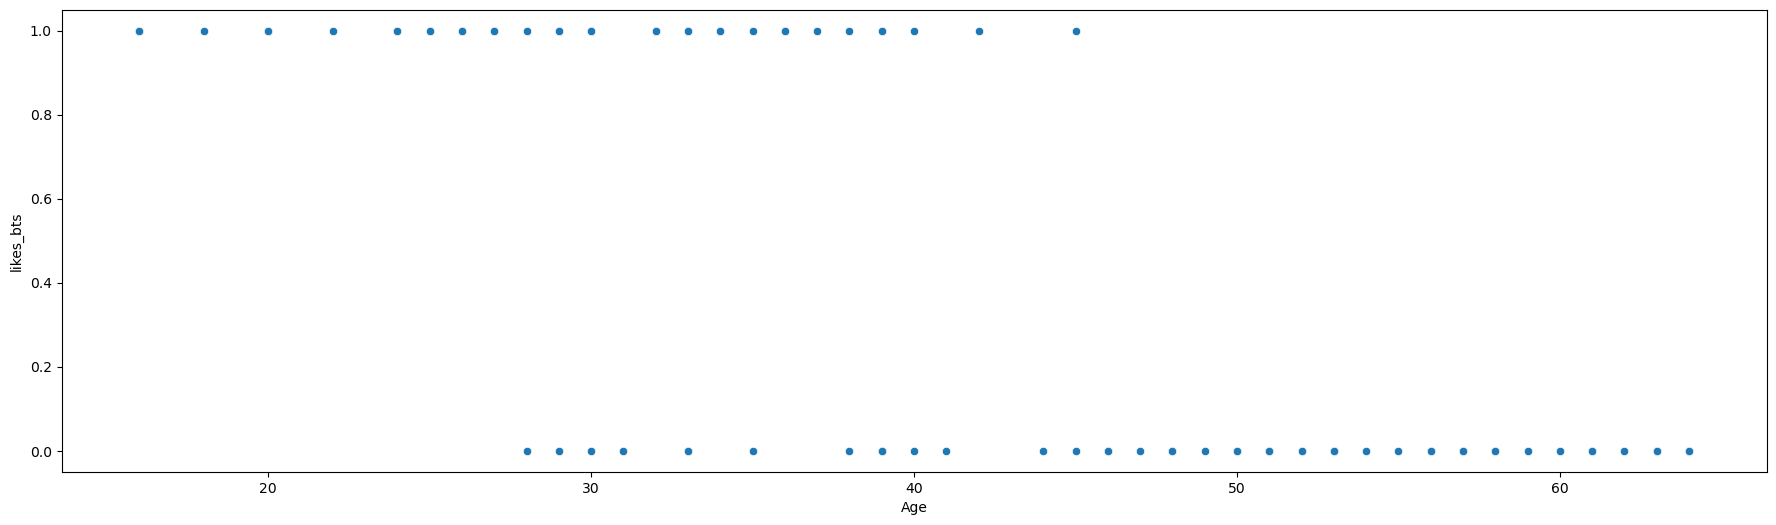

In [11]:
plt.figure(figsize=(22,6))
sns.scatterplot(x=df['Age'], y = df['likes_bts'])
plt.show()

Above saw the graph which make you understand more better way how age is related to the likeing the BTS though, in this dataset I may have did some mistake about the age when I was making it but for protoype I made this dataset though I will improve this dataset in the future but for now I made this to make you understand that age play the big role in our prediction model.

In [12]:
x = df.drop(columns='likes_bts',axis=1)
y = df['likes_bts']

It's time for labeling the dataset and divide in to x and y, where x will contain the everything but the taget and y wil cantain only target which in this case is 'likes_bts' 

In [13]:
print(x)

    Age  Watch_K-pop  use _social_media_actively
0    33            1                           1
1    38            0                           1
2    32            1                           1
3    56            0                           0
4    64            0                           0
..  ...          ...                         ...
95   26            1                           1
96   33            0                           1
97   39            0                           0
98   57            0                           0
99   16            1                           1

[100 rows x 3 columns]


In [14]:
print(y)

0     1
1     0
2     1
3     0
4     0
     ..
95    1
96    0
97    0
98    0
99    1
Name: likes_bts, Length: 100, dtype: int64


In [15]:
scaller = StandardScaler()
scaller.fit(x)

StandardScaler()

First we can't proceed before scalling our data, why you might ask, because it helps the computer to understand data better and make a better pridiction model based on scalled data.
And for that we use StandardScaler to scalling our data

In [16]:
standerd_scaller = scaller.transform(x)

In [17]:
print(standerd_scaller)

[[-0.58708446  1.040833    0.98019606]
 [-0.20783093 -0.96076892  0.98019606]
 [-0.66293516  1.040833    0.98019606]
 [ 1.15748176 -0.96076892 -1.02020406]
 [ 1.7642874  -0.96076892 -1.02020406]
 [-1.2697408   1.040833    0.98019606]
 [-1.04218869  1.040833    0.98019606]
 [ 1.15748176  1.040833   -1.02020406]
 [-0.81463657 -0.96076892  0.98019606]
 [ 0.62652682  1.040833   -1.02020406]
 [ 1.00578035 -0.96076892 -1.02020406]
 [-0.51123375  1.040833    0.98019606]
 [ 1.53673528 -0.96076892 -1.02020406]
 [-0.13198023  1.040833   -1.02020406]
 [-1.1938901   1.040833    0.98019606]
 [ 0.70237753 -0.96076892  0.98019606]
 [ 1.46088458 -0.96076892 -1.02020406]
 [ 1.68843669 -0.96076892 -1.02020406]
 [ 0.55067612 -0.96076892  0.98019606]
 [ 0.77822823 -0.96076892 -1.02020406]
 [-0.05612952  1.040833    0.98019606]
 [-1.57314362  1.040833    0.98019606]
 [-0.13198023  1.040833   -1.02020406]
 [-0.89048728  1.040833    0.98019606]
 [-0.13198023 -0.96076892  0.98019606]
 [-1.2697408   1.040833  

In [18]:
x = standerd_scaller
y = df['likes_bts']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Above you can see that this is time for traing and testing the data for that we need to split the dataset into traing and testing dataset

In [20]:
print(x.shape, x_train.shape, x_test.shape)

(100, 3) (80, 3) (20, 3)


In [21]:
model_1 = LogisticRegression()
model_1.fit(x_train, y_train)

LogisticRegression()

Above you can see we used the logestic Regression classifier as model_1 

In [22]:
pred_x_train = model_1.predict(x_train)
accuracy_x_train = accuracy_score(pred_x_train, y_train)
pred_x_test = model_1.predict(x_test)
accuracy_x_test = accuracy_score(pred_x_test, y_test)
print('Accuracy score for x_train: ', accuracy_x_train)
print('Accuracy score for x_test: ', accuracy_x_test)

Accuracy score for x_train:  0.975
Accuracy score for x_test:  0.95


Here you see Accuracy score for model_1 how well is performing.

In [23]:
model_2 = svm.SVC(kernel='linear')
model_2.fit(x_train, y_train)

SVC(kernel='linear')

Above you can see we used the logestic Regression classifier as model_2

In [24]:
pred_x_train_2 = model_2.predict(x_train)
accuracy_x_train_2 = accuracy_score(pred_x_train_2, y_train)
pred_x_test_2 = model_2.predict(x_test)
accuracy_x_test_2 = accuracy_score(pred_x_test_2, y_test)
print('Accuracy score for x_train model_2: ', accuracy_x_train_2)
print('Accuracy score for x_test model_2: ', accuracy_x_test_2)

Accuracy score for x_train model_2:  0.975
Accuracy score for x_test model_2:  0.95


Here you see Accuracy score for model_2 how well is performing.

In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_x_test_2))

[[12  1]
 [ 0  7]]


Use confusion matrix to check the how many predicted value are true and false respected to there nature weather it's Positive or Negative.

In [30]:
df.sample(10)

,Age,Watch_K-pop,use _social_media_actively,likes_bts
63,24,1,1,1
67,44,0,1,0
5,24,1,1,1
0,33,1,1,1
2,32,1,1,1
35,35,1,1,1
36,48,0,0,0
68,51,1,0,0
52,34,1,1,1
34,48,0,0,0


In [31]:
predic = model_1.predict(x_train)
print(predic)

[1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1
 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1
 1 0 0 1 1 1]


We chose the model_1 though it's have same prediction accuracy as model_2, so you can chose anyone.

In [32]:
df.sample(5)

,Age,Watch_K-pop,use _social_media_actively,likes_bts
50,63,0,0,0
78,33,1,1,1
47,39,1,0,1
42,29,0,1,0
18,48,0,1,0


In [33]:
input_data = (25,1,1)
id_to_array = np.asarray(input_data)
id_reshaped = id_to_array.reshape(1,-1)
std_data = scaller.transform(id_reshaped)
pred = model_1.predict(std_data)
if (pred[0] == 1):
    print('Yes she likes BTS!')
else:
    print('No, she not likes BTS!')

Yes she likes BTS!


C:\Users\PMYLS\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#Here we have our final product ready, we can provide the input data from dataset or give it any random value or you can test it on someone you know, to find out she really likes the BTS or not, but Note that this model is not perfect, it will improve more in future.